In [1]:
import numpy as np
from collections import Counter

In [29]:
class Node:
    def __init__(self,left=None, right=None,threshold=None, feature=None, value = None):
        self.left = left
        self.right = right
        self.threshold = threshold
        self.value = value
        self.feature = feature
     
    

In [30]:
class Decision_Tree:
    def __init__(self,min_sample_split=2, max_depth=100, n_features = None):
        self.min_sample_split=min_sample_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

    def fit(self,X,y):
        if self.n_features is None:
            self.n_features = X.shape[1]
        self.root = self.grow_tree(X,y,0)

    def grow_tree(self,X,y,depth):
        print("----------------------------------------------------------------------------------")
        print("X.shape",X.shape)
        n_rows, n_cols = X.shape
        print("rows:",n_rows," cols:",n_cols)
        n_labels = len(np.unique(y))
        print("No of labels:",n_labels)
        
        # Stop condition
        if (depth>=self.max_depth or n_labels == 1 or n_rows<self.min_sample_split):
            val = self.most_frequent_label(y)
            print(" Node(value = val):",val)
            return Node(value = val)

        # Best Split condition
        feature_index = np.random.choice(n_cols, self.n_features, replace = False)    # To randomly select features/cols
        print("feature_index:",feature_index)
        best_threshold, best_feature = self.best_split(X,y,feature_index)
        print("best_threshold:",best_threshold," best_feature:", best_feature)
    
        #Create child node
        left_index, right_index = self.split(X[:,best_feature],best_threshold)
        print("Elements is left node",len(X[left_index,:]))
        print("Elements is right node",len(X[right_index,:]))
        print('''\n
                 //
                //
                ==============
                \\
                 \\ 
                 Enter left side''')
        
        
        left = self.grow_tree(X[left_index,:],y[left_index],depth+1)
        print('''\n
                           \\
                            \\
                ==============
                            //
                           //
                 Enter right side''')
        right = self.grow_tree(X[right_index,:],y[right_index],depth+1)
        print("Returning node")
        return Node(left,right,best_threshold,best_feature)

    def most_frequent_label(self,y):    # This will return the first most frequent lable from y
        if len(y) == 0:
           return None
        count = Counter(y)
        frequency = count.most_common(1)[0][0]
        return frequency

    def entropy(self,y):
        count = np.bincount(y)   # bincount returns the frequency of elements
        P = count/len(y)
        return (-np.sum([p*np.log(p) for p in P if p>0]))
        
    def info_gain(self,X_col,y,thr):
        parent_entropy = self.entropy(y)

        # Create Children 
        left_index, right_index = self.split(X_col,thr)

        # Returning 0 when there is only single type of label: means entropy is 0
        if len(left_index) == 0 or len(right_index) == 0:
            return 0
        
        #Calculate the Weigthed avg of Entropy of children
        n = len(y)
        w_left, w_right = len(left_index)/n, len(right_index)/n
        entro_left,entro_right = self.entropy(y[left_index]), self.entropy(y[right_index])
        child_entropy = w_left*entro_left + w_right*entro_right

        # Information gain
        return parent_entropy - child_entropy
        
    def split(self,X_col,threshold):
        # np.argwhere returns the index of elements which smaller than threshold
        #print("threshold in X_col:",threshold)
        left_index = np.argwhere(X_col<=threshold).flatten()
        #print("left_index:",left_index)
        right_index = np.argwhere(X_col>threshold).flatten()
        #print("right_index",right_index)
        return left_index,right_index
        
    def best_split(self,X,y,feature_index):
        print("feature_index:",feature_index)
        # Setting initial info gain as -1
        best_info_gain = -1
        
        # setting initial value as none for split_index and split_threshold
        split_index= None
        split_threshold = None     

        for index in feature_index:
            print("==========================================index:", index,"===============================================")
            X_col = X[:,index]
            print("Priniting only 10 rows of X_col ", X_col[:11,])
            thres = np.unique(X_col)
            #print("thres:",thres)
            
            for thr in thres:
                #print("thr:",thr)
                gain = self.info_gain(X_col,y,thr)
                if gain>best_info_gain:
                    best_info_gain = gain
                    split_threshold = thr
                    split_index = index

        print("Best Gain:", best_info_gain)
        return split_threshold,split_index
        
    def predict(self,X):
       return np.array([self.traverse_tree(x,self.root) for x in X]) 

    def traverse_tree(self, x, node):
       print("x",x)
       if node.value is not None:
           print("node value: ",node.value)
           return node.value

       if x[node.feature]<= node.threshold:
           print("x[",x[node.feature],"] <= ",node.threshold)
           return self.traverse_tree(x,node.left)
       else:
           print("x[",x[node.feature],"] > ",node.threshold)
           return self.traverse_tree(x,node.right)

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [5]:
from sklearn import datasets
df=datasets.load_iris()
X = df.data
y = df.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [8]:
reg = DecisionTreeRegressor()

In [9]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [10]:
y_pred = reg.predict(X_test)

In [11]:
import matplotlib.pyplot as plt 

In [12]:
from sklearn import tree

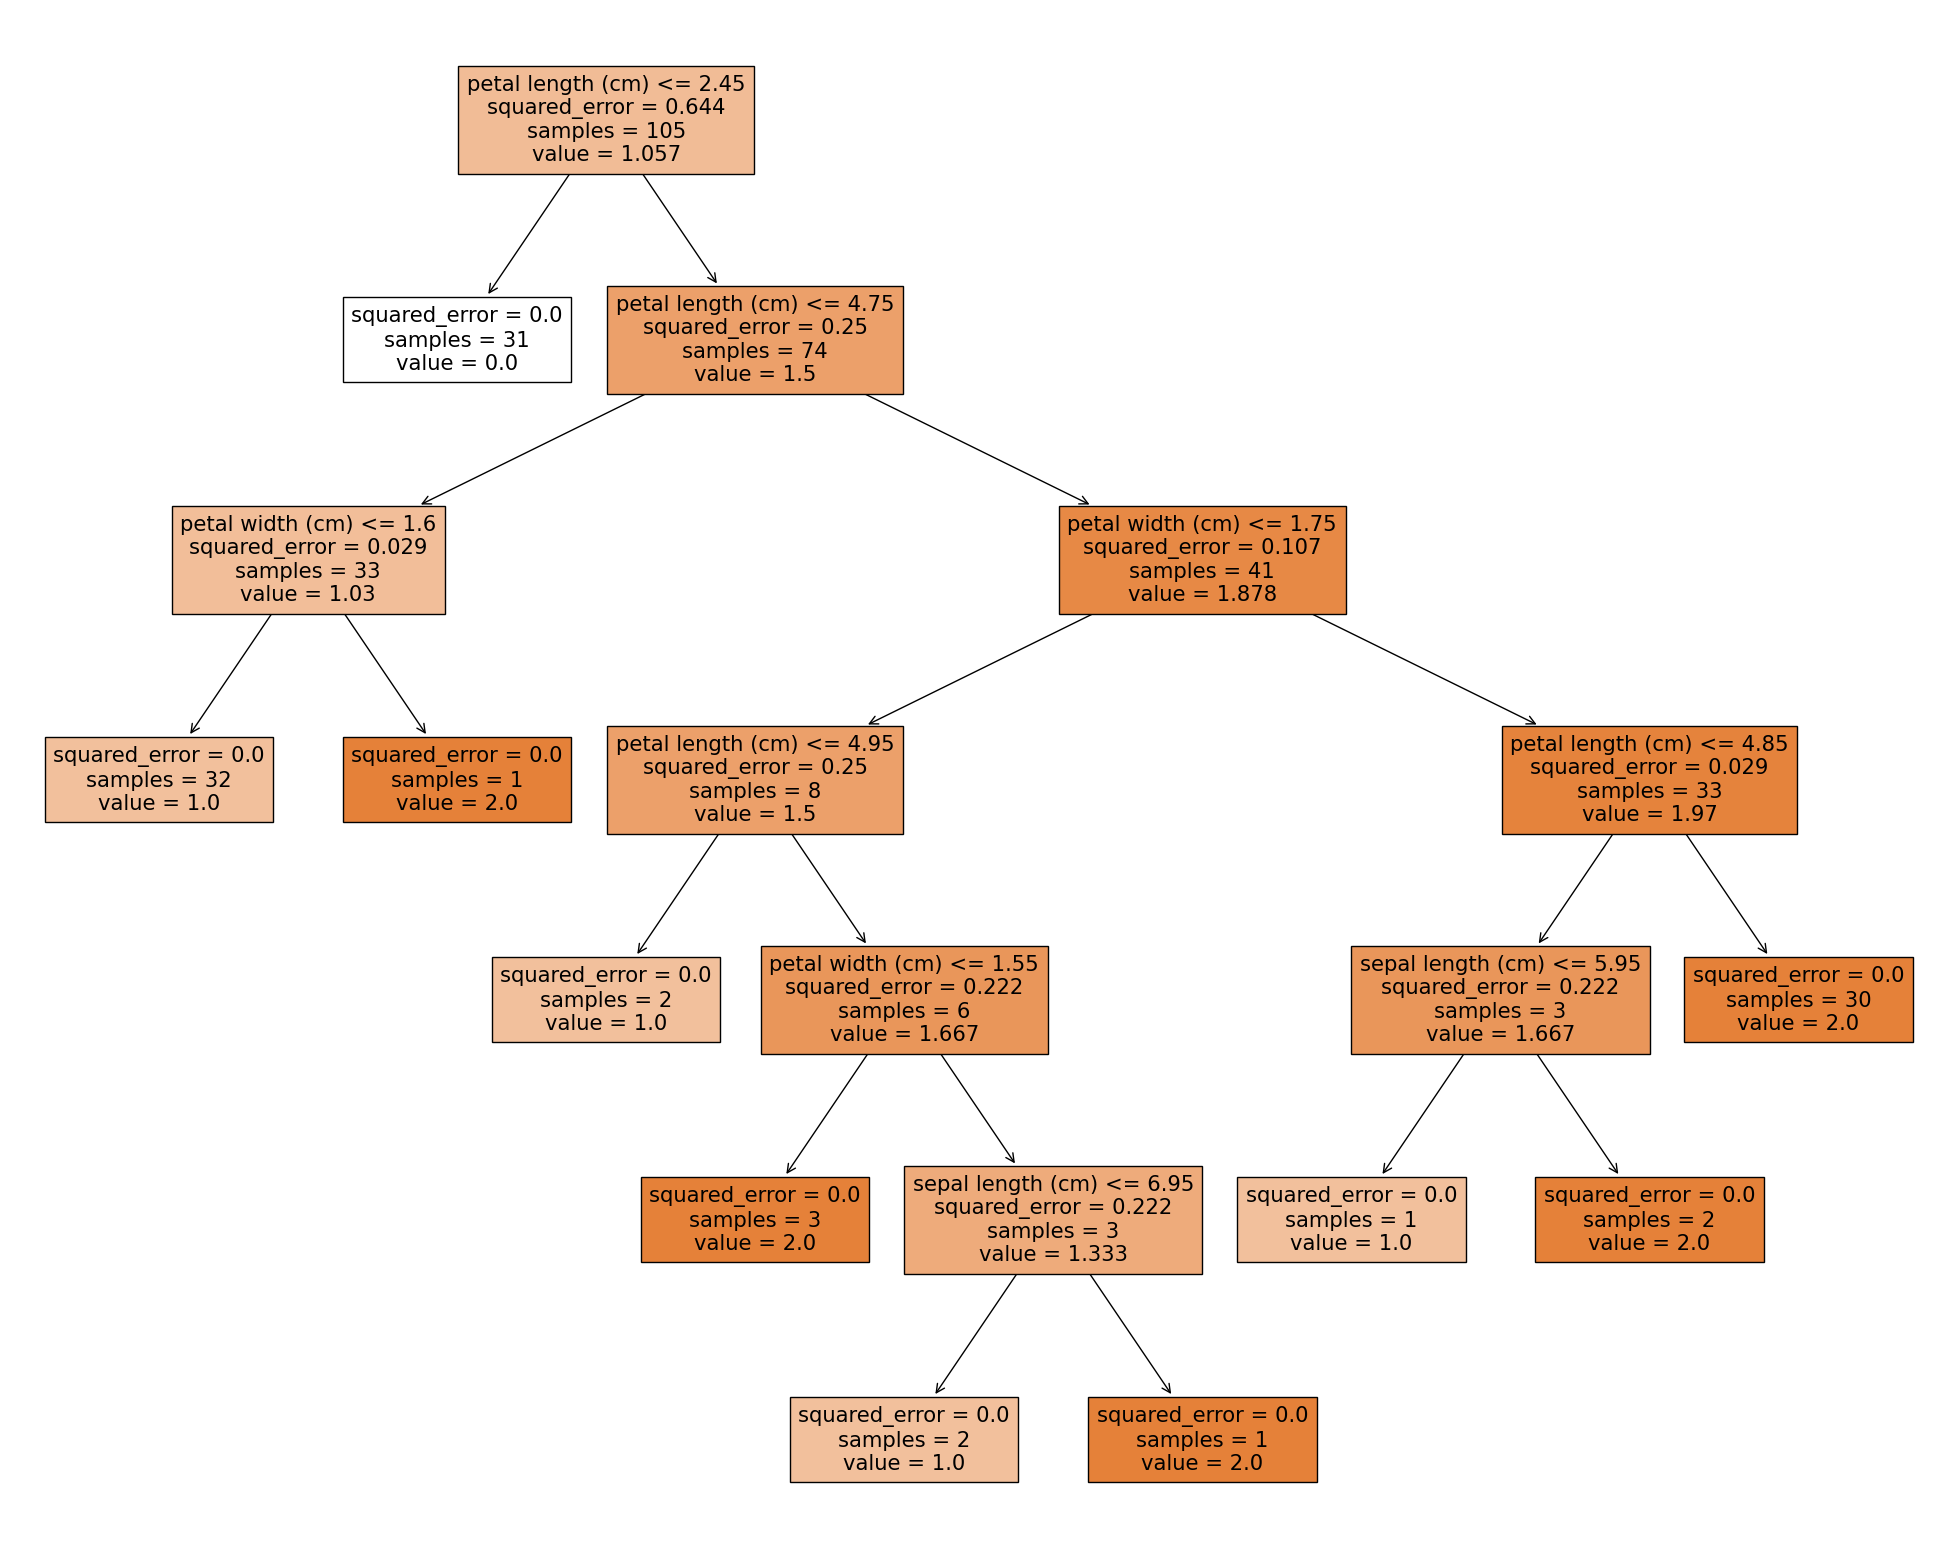

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, 
                   feature_names=df.feature_names,  
                   class_names=df.target_names,
                   filled=True)

In [14]:
print(tree.export_text(reg))

|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- value: [1.00]
|   |   |--- feature_3 >  1.60
|   |   |   |--- value: [2.00]
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- value: [2.00]
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- value: [2.00]
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- value: [2.00]



In [15]:
!pip install graphviz

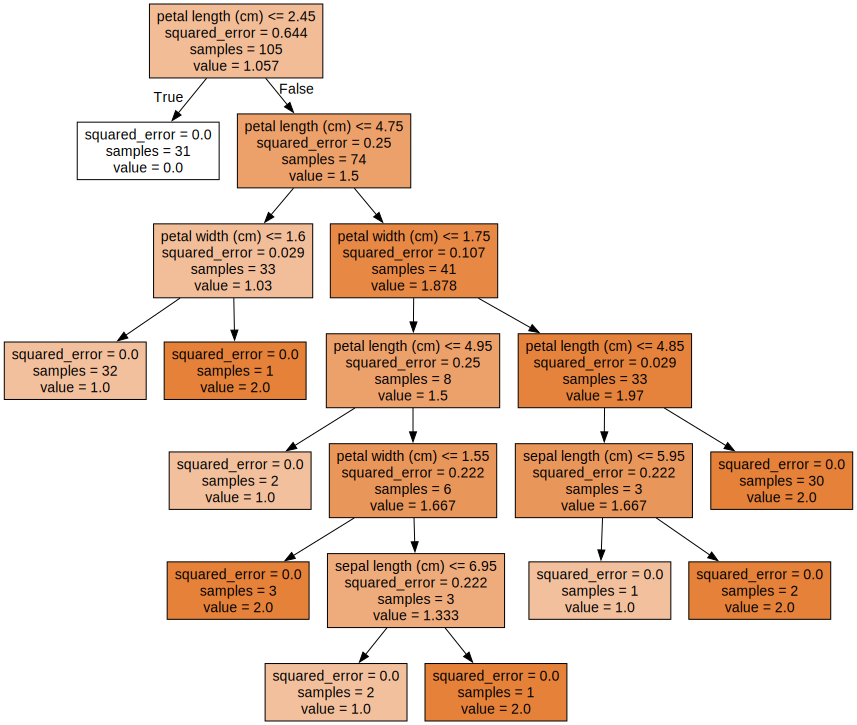

In [16]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(reg, out_file=None, 
                                feature_names=df.feature_names,  
                                class_names=df.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [37]:
D_reg = Decision_Tree()

In [38]:
D_reg.fit(X_train,y_train)

----------------------------------------------------------------------------------
X.shape (105, 4)
rows: 105  cols: 4
No of labels: 3
feature_index: [2 0 3 1]
feature_index: [2 0 3 1]
==========================================index: 2 ===============================================
Priniting only 10 rows of X_col  [3.7 5.1 5.5 4.4 6.1 4.2 6.6 4.5 1.4 6.7 4.1]
==========================================index: 0 ===============================================
Priniting only 10 rows of X_col  [5.5 6.3 6.4 6.6 7.2 5.7 7.6 5.6 5.1 7.7 5.8]
==========================================index: 3 ===============================================
Priniting only 10 rows of X_col  [1.  1.5 1.8 1.4 2.5 1.3 2.1 1.5 0.2 2.  1. ]
==========================================index: 1 ===============================================
Priniting only 10 rows of X_col  [2.4 2.8 3.1 3.  3.6 2.9 3.  3.  3.5 2.8 2.7]
Best Gain: 0.6067753955275417
best_threshold: 1.9  best_feature: 2
Elements is left node 31
Elements is

In [43]:
D_reg_y_pred = D_reg.predict(X_test)

x [6.1 2.8 4.7 1.2]
x[ 4.7 ] >  1.9
x [6.1 2.8 4.7 1.2]
x[ 1.2 ] <=  1.7
x [6.1 2.8 4.7 1.2]
x[ 4.7 ] <=  4.9
x [6.1 2.8 4.7 1.2]
x[ 1.2 ] <=  1.5
x [6.1 2.8 4.7 1.2]
node value:  1
x [5.7 3.8 1.7 0.3]
x[ 1.7 ] <=  1.9
x [5.7 3.8 1.7 0.3]
node value:  0
x [7.7 2.6 6.9 2.3]
x[ 6.9 ] >  1.9
x [7.7 2.6 6.9 2.3]
x[ 2.3 ] >  1.7
x [7.7 2.6 6.9 2.3]
x[ 6.9 ] >  4.8
x [7.7 2.6 6.9 2.3]
node value:  2
x [6.  2.9 4.5 1.5]
x[ 4.5 ] >  1.9
x [6.  2.9 4.5 1.5]
x[ 1.5 ] <=  1.7
x [6.  2.9 4.5 1.5]
x[ 4.5 ] <=  4.9
x [6.  2.9 4.5 1.5]
x[ 1.5 ] <=  1.5
x [6.  2.9 4.5 1.5]
node value:  1
x [6.8 2.8 4.8 1.4]
x[ 4.8 ] >  1.9
x [6.8 2.8 4.8 1.4]
x[ 1.4 ] <=  1.7
x [6.8 2.8 4.8 1.4]
x[ 4.8 ] <=  4.9
x [6.8 2.8 4.8 1.4]
x[ 1.4 ] <=  1.5
x [6.8 2.8 4.8 1.4]
node value:  1
x [5.4 3.4 1.5 0.4]
x[ 1.5 ] <=  1.9
x [5.4 3.4 1.5 0.4]
node value:  0
x [5.6 2.9 3.6 1.3]
x[ 3.6 ] >  1.9
x [5.6 2.9 3.6 1.3]
x[ 1.3 ] <=  1.7
x [5.6 2.9 3.6 1.3]
x[ 3.6 ] <=  4.9
x [5.6 2.9 3.6 1.3]
x[ 1.3 ] <=  1.5
x [5.6 2.9 3.6 1.3]


In [44]:
print(np.sum(y_pred==D_reg_y_pred)/len(X_test))

0.9555555555555556


In [45]:
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 1., 0.,
       0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0.])

In [46]:
D_reg_y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0])